In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/04%20Wine%20Quality%20Red%20Dataset/Wine_Quality_red.csv')
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data1=data.drop('Unnamed: 0',axis=1)

In [8]:
data1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
data1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
x_data=data1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [11]:
y_data=data1['quality']

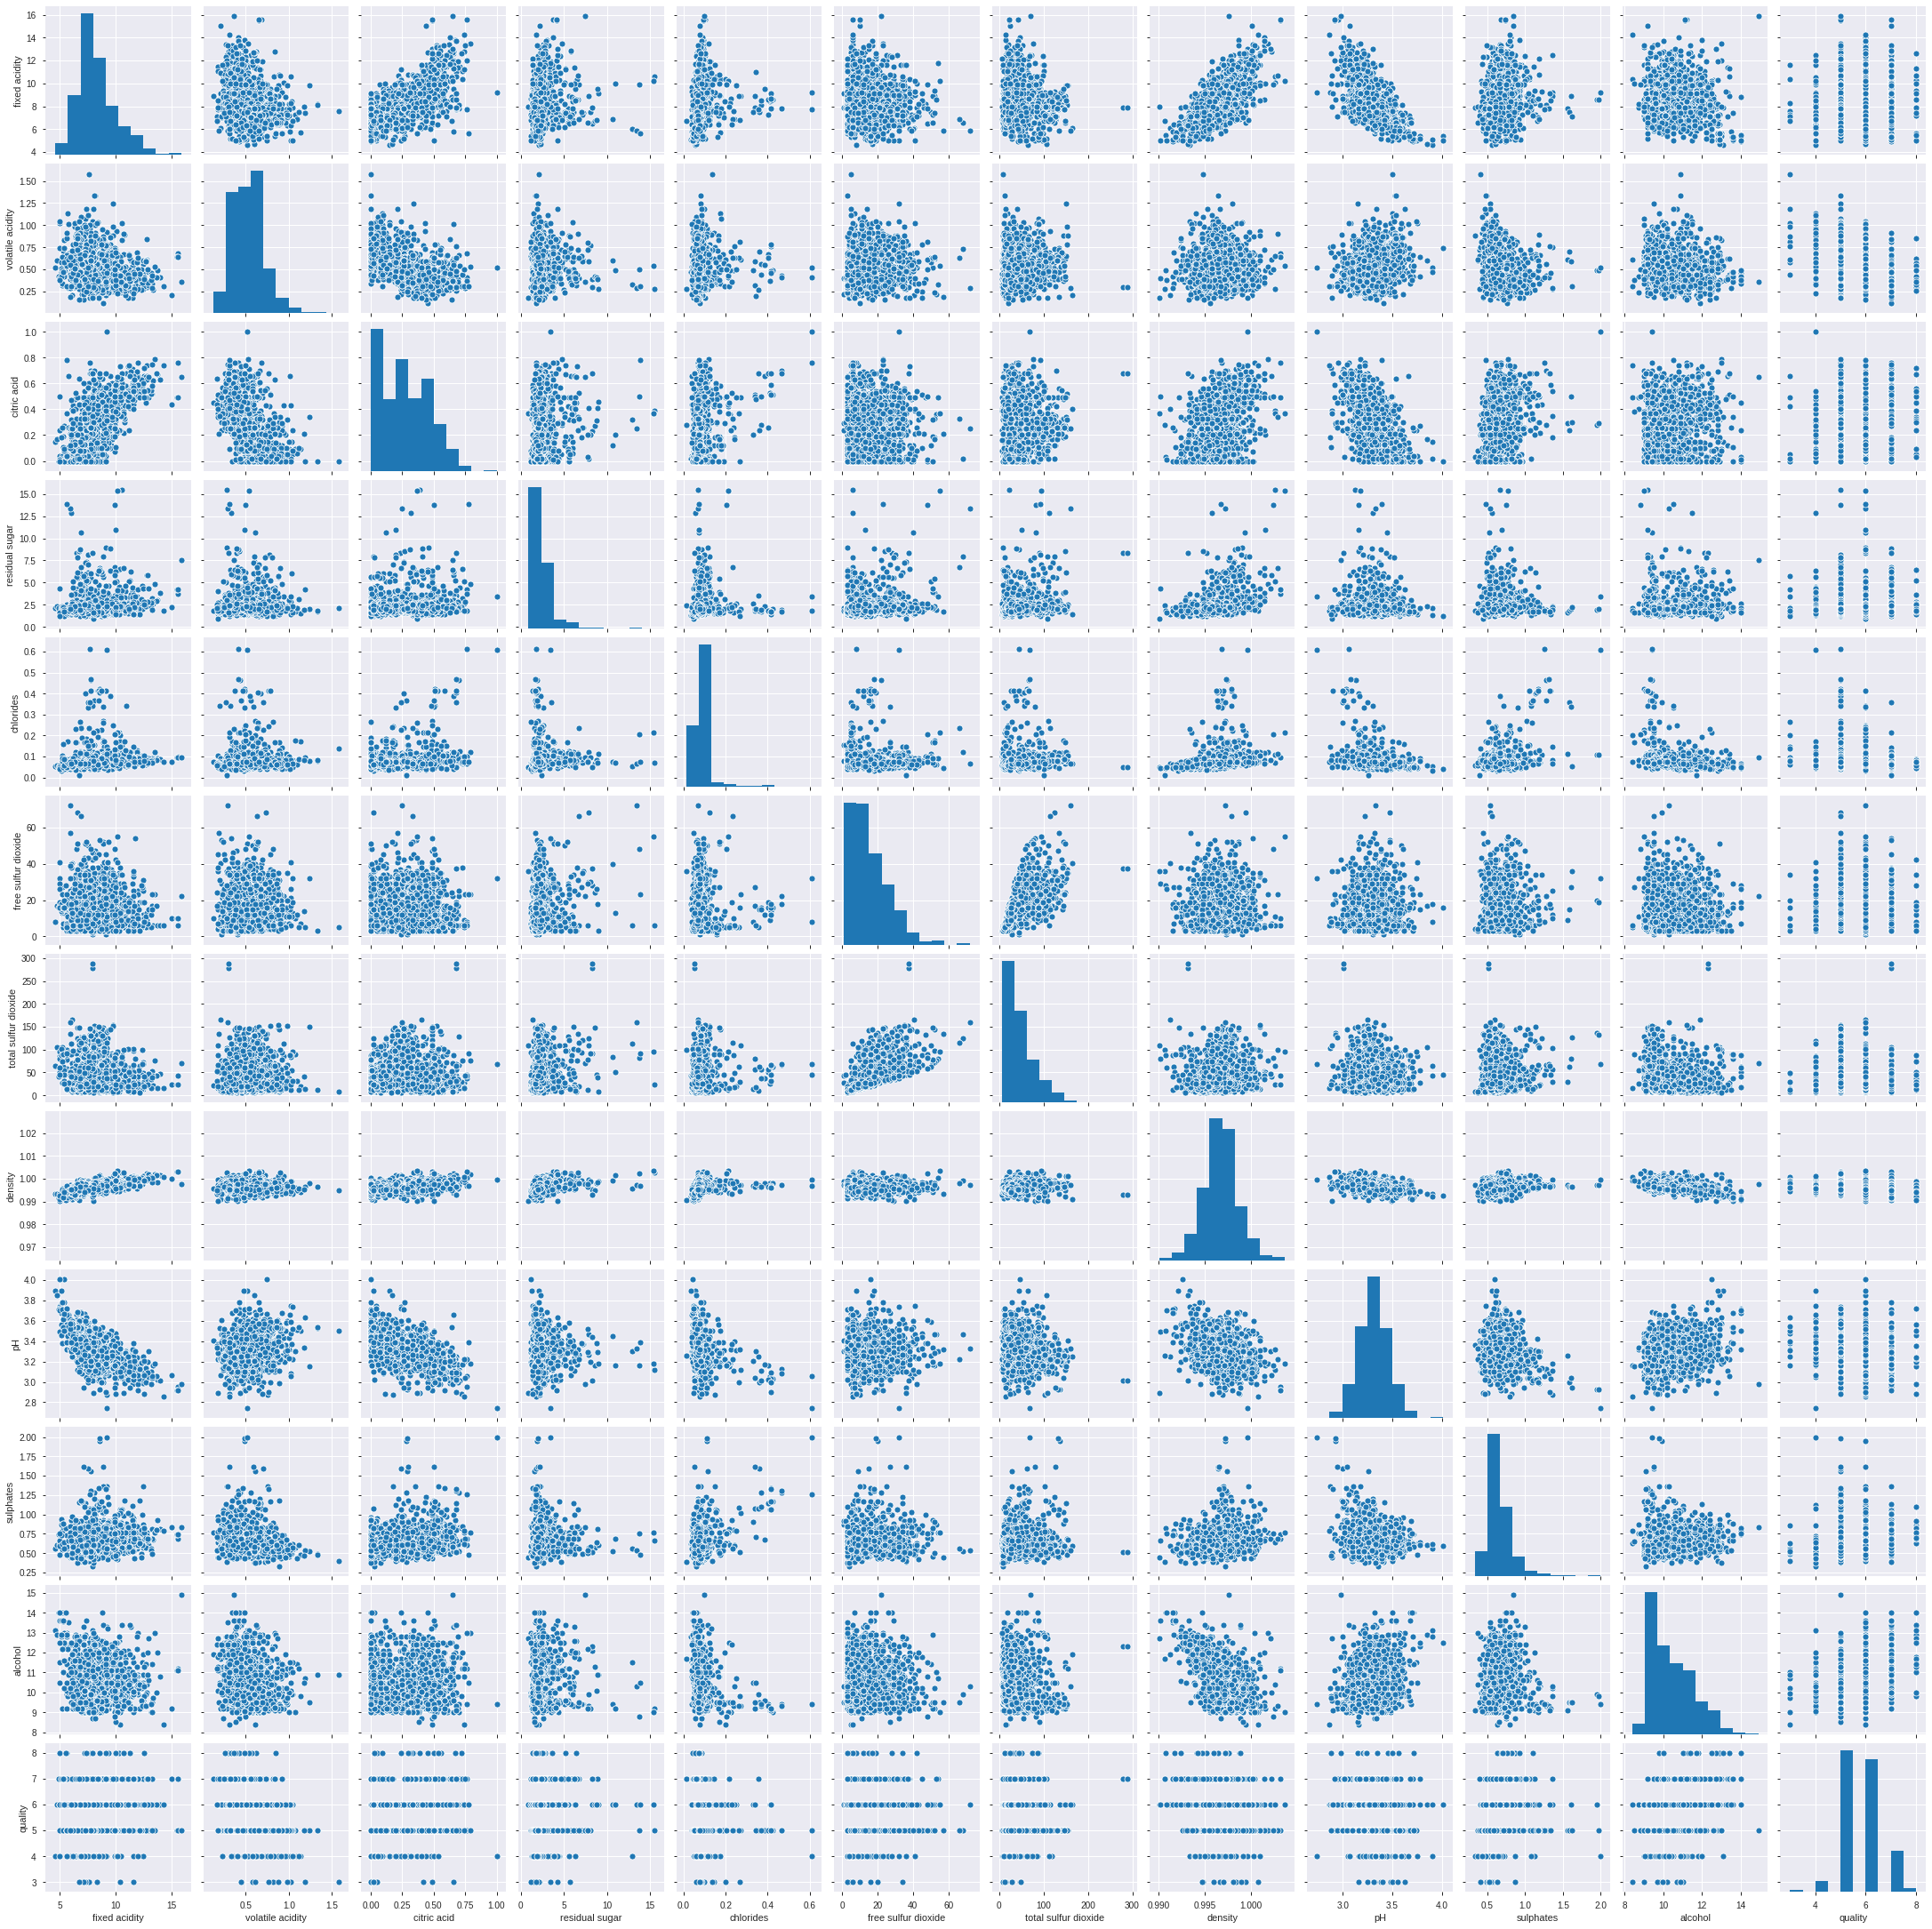

In [12]:
sns.pairplot(data1)

In [13]:
pandas_profiling.ProfileReport(data1)

In [68]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.25,random_state=10)

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
X_traine.shape

(1199, 11)

In [72]:
Y_traine.shape

(1199,)

In [73]:
X_test.shape

(400, 11)

In [74]:
Y_test.shape

(400,)

In [75]:
train_score=lr.score(X_traine,Y_traine)
train_score

0.35021283936540704

In [76]:
test_score=lr.score(X_test,Y_test)
test_score

0.37736425376670935

In [77]:
lr.coef_

array([ 1.48701388e-02, -1.22168781e+00, -2.12495770e-01,  2.31764056e-03,
       -1.90166568e+00,  2.91038870e-03, -3.46553215e-03, -5.87578825e+00,
       -3.60977325e-01,  8.26427202e-01,  2.63584451e-01])

In [78]:
lr.intercept_

10.254207175782685

In [79]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine,Y_traine)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
Ridge_train_score=rr.score(X_traine,Y_traine)
Ridge_train_score

0.35018498774531776

In [81]:
Ridge_test_score=rr.score(X_test,Y_test)
Ridge_test_score

0.37691230616150506

In [82]:
rr.coef_

array([ 9.60604770e-03, -1.22594500e+00, -2.12272400e-01,  4.74561825e-05,
       -1.90305794e+00,  2.95740778e-03, -3.48111595e-03, -3.85367391e-01,
       -3.88789153e-01,  8.17752038e-01,  2.68693398e-01])

In [83]:
rr.intercept_

4.878045731005482

In [84]:
rr100=Ridge(alpha=100)
rr100.fit(X_traine,Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
rr100.coef_

array([ 0.03992776, -0.32561244,  0.09019755, -0.0113717 , -0.03446627,
        0.00522807, -0.00363101, -0.00056951, -0.04809113,  0.19919834,
        0.29094756])

In [86]:
rr100.intercept_

2.5693711307121436

In [87]:
Ridge_train_score100=rr100.score(X_traine,Y_traine)
Ridge_train_score100

0.28888899444141347

In [88]:
Ridge_test_score100=rr100.score(X_test,Y_test)
Ridge_test_score100

0.33889244803606877

In [89]:
lo=Lasso(alpha=(0.01)**2)
lo.fit(X_traine,Y_traine)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
lo.coef_

array([ 9.54584824e-03, -1.22336606e+00, -2.04843964e-01, -2.14374432e-04,
       -1.85558986e+00,  2.96130828e-03, -3.47664532e-03, -0.00000000e+00,
       -3.77914077e-01,  8.08482970e-01,  2.69199502e-01])

In [91]:
lo.intercept_

4.452086291601216

In [92]:
Lasso_train_score=lo.score(X_traine,Y_traine)
Lasso_train_score

0.35016690332592504

In [93]:
Lasso_test_score=lo.score(X_test,Y_test)
Lasso_test_score

0.3768262883151048

In [94]:
lo100=Lasso(alpha=(100)**2)
lo100.fit(X_traine,Y_traine)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
lo100.coef_

array([ 0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.])

In [96]:
lo100.intercept_

5.631359466221851

In [97]:
Lasso_train_score100=lo100.score(X_traine,Y_traine)
Lasso_train_score100

0.0

In [98]:
Lasso_test_score100=lo100.score(X_test,Y_test)
Lasso_test_score100

-0.0004842780481313369

In [99]:
print("linear regression trine score",train_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)
print("linear regression trine score low_alpha",Lasso_train_score)
print("linear regression test score high_alpha",Lasso_test_score)
print("linear regression trine score low_alpha",Lasso_train_score100)
print("linear regression test score high_alpha",Lasso_test_score100)

linear regression trine score 0.35021283936540704
linear regression test score 0.37736425376670935
linear regression trine score low_alpha 0.35018498774531776
linear regression test score high_alpha 0.37691230616150506
linear regression trine score low_alpha 0.28888899444141347
linear regression test score high_alpha 0.33889244803606877
linear regression trine score low_alpha 0.35016690332592504
linear regression test score high_alpha 0.3768262883151048
linear regression trine score low_alpha 0.0
linear regression test score high_alpha -0.0004842780481313369


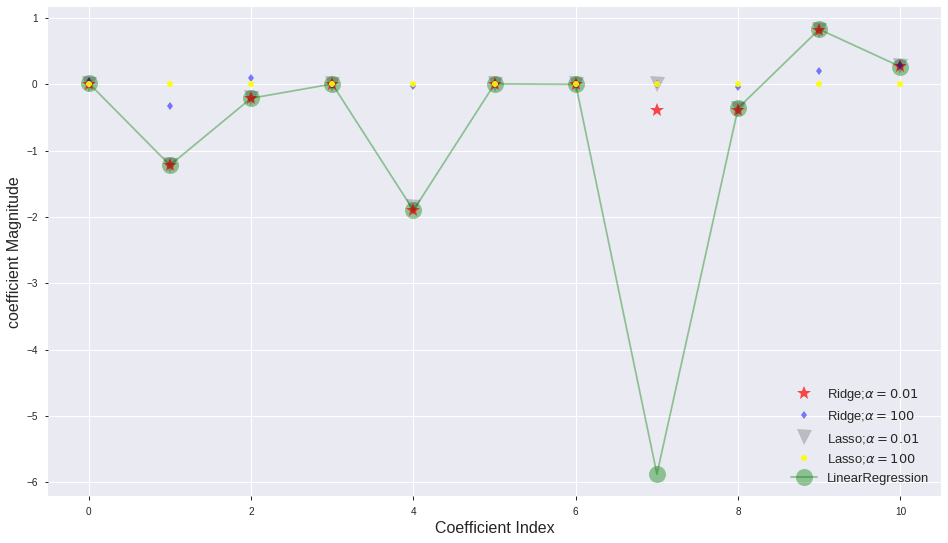

In [100]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
plt.plot(lo.coef_,alpha=0.2,linestyle='none',marker='v',markersize=15,color='black',
         label=r'Lasso;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(lo100.coef_,alpha=0.9,linestyle='none',marker='8',markersize=6,color='yellow',
         label=r'Lasso;$\alpha=100$',zorder=7)

#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [101]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [102]:
Lasso_CV.fit(X_traine,Y_traine)
Ridge_CV.fit(X_traine,Y_traine)
rr.fit(X_traine,Y_traine)
Lo.fit(X_traine,Y_traine)
ENET.fit(X_traine,Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test),
            'Ridge_CV_pred':Ridge_CV.predict(X_test),
                        'rr':rr.predict(X_test),
                        'Lo':Lo.predict(X_test),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
1518,5.751281,5.672267,5.680298,5.732422,5
1246,5.185833,5.223087,5.219342,5.628247,5
544,5.571411,5.701207,5.666543,5.751025,6
1343,5.654717,5.665891,5.673899,5.691496,6
428,5.360722,5.390263,5.377113,5.695217,5
...,...,...,...,...,...
39,5.642419,5.729750,5.705682,5.483147,5
1211,5.364641,5.435383,5.418826,5.609645,5
1000,6.139574,6.173400,6.161771,5.762186,7
188,5.038180,5.032292,5.034005,5.274797,5


In [104]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [105]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [106]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

In [107]:
Y_predict

array([5.57218571, 5.19344795, 5.56247176, 5.6679508 , 5.31448824,
       6.28096733, 6.07022175, 5.7451435 , 5.15972339, 5.19400392,
       6.25827059, 5.14228318, 5.11755717, 4.9210368 , 5.18592465,
       5.15146675, 5.35247928, 5.68379914, 5.41903947, 4.86810702,
       4.95681742, 6.03382178, 5.51068319, 5.3616957 , 4.92991141,
       5.63135102, 6.00130747, 5.53265   , 5.72339598, 5.24034782,
       5.37764715, 5.27692457, 5.83141756, 6.15151761, 6.11345273,
       5.11203924, 6.45990589, 5.47503134, 5.86139514, 5.28513822,
       5.89929789, 5.93616066, 5.27534199, 6.36594533, 4.89702474,
       6.07022175, 5.58035249, 5.73309121, 6.69588639, 5.72346741,
       5.86785217, 6.59100483, 6.44443111, 6.28859251, 5.4292139 ,
       6.62244929, 5.627427  , 4.4033102 , 5.44127776, 5.41115292,
       5.82098114, 5.44284821, 6.25658059, 5.88057828, 5.36522183,
       5.25234014, 5.73305425, 5.62977038, 5.38924465, 5.89940959,
       5.81107947, 5.22778739, 5.47966589, 5.46443393, 5.31824

In [108]:
Y_test

1518    5
1246    5
544     6
1343    6
428     5
       ..
39      5
1211    5
1000    7
188     5
1198    6
Name: quality, Length: 400, dtype: int64